In [1]:
from pod import POD
from matplotlib import pyplot as plt
from matplotlib.tri import Triangulation
import numpy as np
import torch

# POD on thermal problem

This notebook contains the report valid for the exam of Computational Mechanics with ROM. The goal of the project is to implement efficient Reduced order method strategies to approximate the solution of different steady state thermal problems. The dataset presented in this work have been generated using deal.II library v$9.6.2$.

## Problem formulation

The heat equation we used entire all the work is 

$$
\begin{cases}
k \nabla^2 u = 0 & \text{in } \Omega

\end{cases}
$$

We consider a $2$D rectangular domain $[0,3] \times [0,6]$ we refine glabally the grid $7$ times, leading to $16000$ cells.



In [2]:
def read_data(filename):
    data = np.load(filename)
    simulations = torch.tensor(data['solutions'], dtype=torch.float64)
    parameters = torch.tensor(data['parameters'], dtype=torch.float64)
    return simulations, parameters 

def split_data(simulations, parameters):
    train_size = int(len(parameters) * .8)
    p_train = parameters[:train_size]
    u_train = simulations[:train_size]
    
    p_test = parameters[train_size:]
    u_test = simulations[train_size:]
    return p_train, u_train, p_test, u_test

def compute_L2_error(u_true, u_pred):
    return torch.linalg.norm(u_true - u_pred) / torch.linalg.norm(u_true)
    
def plot_singular_values(singular_values):
    singular_values = singular_values / singular_values[0]
    plt.semilogy(singular_values, marker='o')    

def plot_comparison(u_pred, u_true, x, y, label):
    tria = Triangulation(x, y)
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))

    diff = torch.abs(u_pred - u_true)
    
    levels_main = torch.linspace(0, u_true.max().item(), steps=100)
    levels_diff = torch.linspace(0, diff.max().item(), steps=100)
    
    # Plot predicted solution
    ax[0].set_title(label)
    tcf0 = ax[0].tricontourf(tria, u_pred, cmap='jet', levels=levels_main)
    fig.colorbar(tcf0, ax=ax[0])
    
    # Plot true solution
    ax[1].set_title("True")
    tcf1 = ax[1].tricontourf(tria, u_true, cmap='jet', levels=levels_main)
    fig.colorbar(tcf1, ax=ax[1])
    
    # Plot difference between true and predicted solutions
    ax[2].set_title("Difference")
    tcf2 = ax[2].tricontourf(tria, diff, cmap='jet', levels=levels_diff)
    fig.colorbar(tcf2, ax=ax[2])

### Formulation 1

For this simplest scenario we decided to apply a simple POD stategy.

/u/f/folivo/PINA/pina/model/block/pod_block.py: UserWarning: Considering a randomized algorithm to compute the POD basis


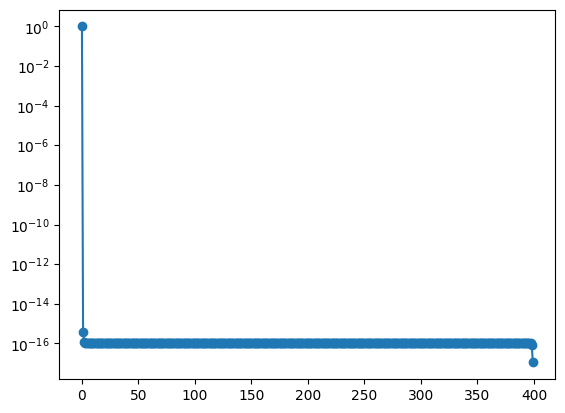

In [3]:
# Data loading
simulations, parameters = read_data("data_simple.npz")
p_train, u_train, p_test, u_test = split_data(simulations, parameters)

# Plotting singular values
pod = POD(len(p_train))
pod.fit(u_train)
plot_singular_values(pod.singular_values)

In [5]:
# Perform POD
pod = POD(1, fixed_stiffness=True) # POD with a singol mode
pod.fit(u_train)
u_pred = pod.predict(p_test.unsqueeze(-1))

In [ ]:
plot_comparison(u_pred[20], u_test[20], pod.x, pod.y, "POD")
print(f"POD L2 error: {compute_L2_error(u_test, u_pred):.4e}")

# Formulation 2

In [ ]:
# Data loading
simulations, parameters = read_data("data_vert.npz")
p_train, u_train, p_test, u_test = split_data(simulations, parameters)

# Plotting singular values
pod = POD(len(p_train))
pod.fit(u_train)
plot_singular_values(pod.singular_values)